In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [3]:
#add label mask
mask=data.loc[:,'pass'] == 1
print(~mask)

0      False
1      False
2      False
3      False
4       True
       ...  
113     True
114     True
115     True
116     True
117     True
Name: pass, Length: 118, dtype: bool


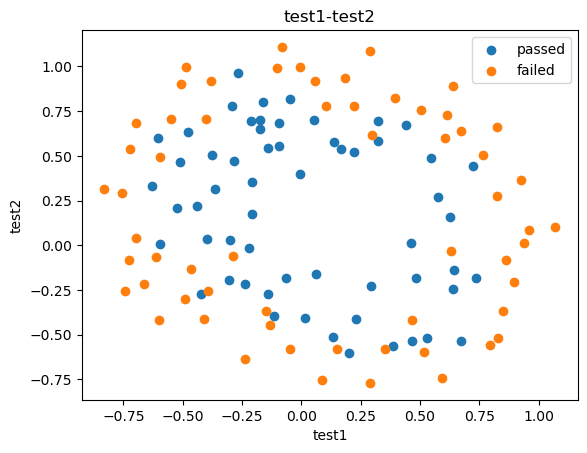

In [4]:
#visualize the data
%matplotlib inline 
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [5]:
#define X,y
X = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']
X1.head()
#create new data
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [6]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

d:\anaconda\envs\dd\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


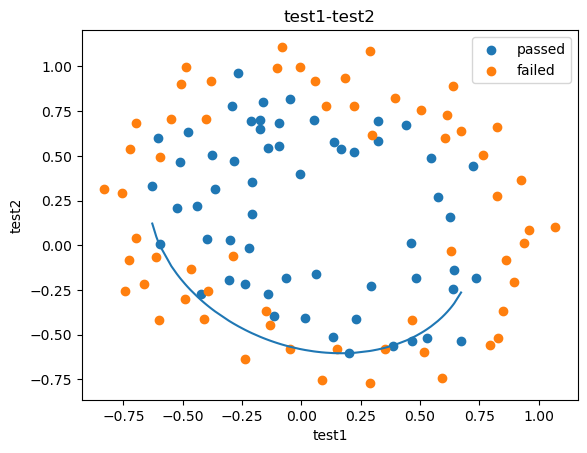

In [7]:
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()